In [21]:
from langgraph.graph import StateGraph, START,END
from typing import TypedDict

In [22]:
class QuadState(TypedDict):
    a: int
    b: int
    c: int

    equation:str
    discriminant:float
    result:str

In [23]:
def show_equation(state:QuadState):
    equation=f'{state["a"]}x^2 + {state["b"]}x + {state["c"]} = 0'
    return {'equation':equation}

In [24]:
def calculate_discriminant(state:QuadState):
    discriminant=state['b']**2-4*state['a']*state['c']
    return {'discriminant':discriminant}

In [25]:
def real_root(state:QuadState):
    root1=(-state['b']+state['discriminant']**0.5)/(2*state['a'])
    root2=(-state['b']-state['discriminant']**0.5)/(2*state['a'])

    result=f'Roots are {root1} and {root2}'
    return {'result':result}

In [26]:
def repeated_root(state:QuadState):
    root=-state['b']/(2*state['a'])
    result = f'Only repeating root is {root}'
    return {'result':result}

In [27]:
def no_root(state:QuadState):
    result = f'There are no real roots'
    return {'result':result}

In [28]:
def check_condition(state:QuadState):
    if state['discriminant']>0:
        return 'real_root'
    elif state['discriminant']==0:
        return 'repeated_root'
    else:
        return 'no_root'

In [29]:
graph=StateGraph(QuadState)

graph.add_node('show_equation',show_equation)
graph.add_node('calculate_discriminant',calculate_discriminant)
graph.add_node('real_root',real_root)
graph.add_node('repeated_root',repeated_root)
graph.add_node('no_root',no_root)

graph.add_edge(START,'show_equation')
graph.add_edge('show_equation','calculate_discriminant')
graph.add_conditional_edges('calculate_discriminant',check_condition,
    {
        'real_root': 'real_root',
        'repeated_root': 'repeated_root',
        'no_root': 'no_root'
    })
graph.add_edge('real_root',END)
graph.add_edge('repeated_root',END)
graph.add_edge('no_root',END)

workflow=graph.compile()



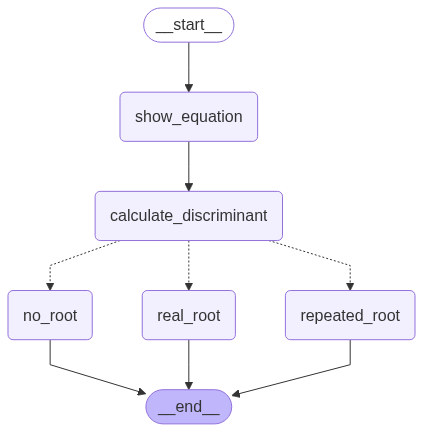

In [30]:
workflow

In [31]:
initial_state = {
    "a": 1,
    "b": -30,
    "c": -20
}

# Run workflow
result = workflow.invoke(initial_state)
print(result)

{'a': 1, 'b': -30, 'c': -20, 'equation': '1x^2 + -30x + -20 = 0', 'discriminant': 980, 'result': 'Roots are 30.65247584249853 and -0.6524758424985286'}
